In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)


# Lending Club Case Study

## Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
You work for a __consumer finance__ company which specialises in lending various types of loans to urban customers. \
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. \
Two types of risks are associated with the bank’s decision:

1) __If__ the applicant is likely to repay the loan, __then__ not approving the loan results in a loss of business to the company

2) __If__ the applicant is not likely to repay the loan, i.e. he/she is likely to default, __then__ approving the loan may lead to a financial loss for the company

 

The data given below contains information about 
1. past loan applicants
2. whether they ‘defaulted’ or not.

The aim is to : \
__identify patterns which indicate if a person is likely to default__ \
which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

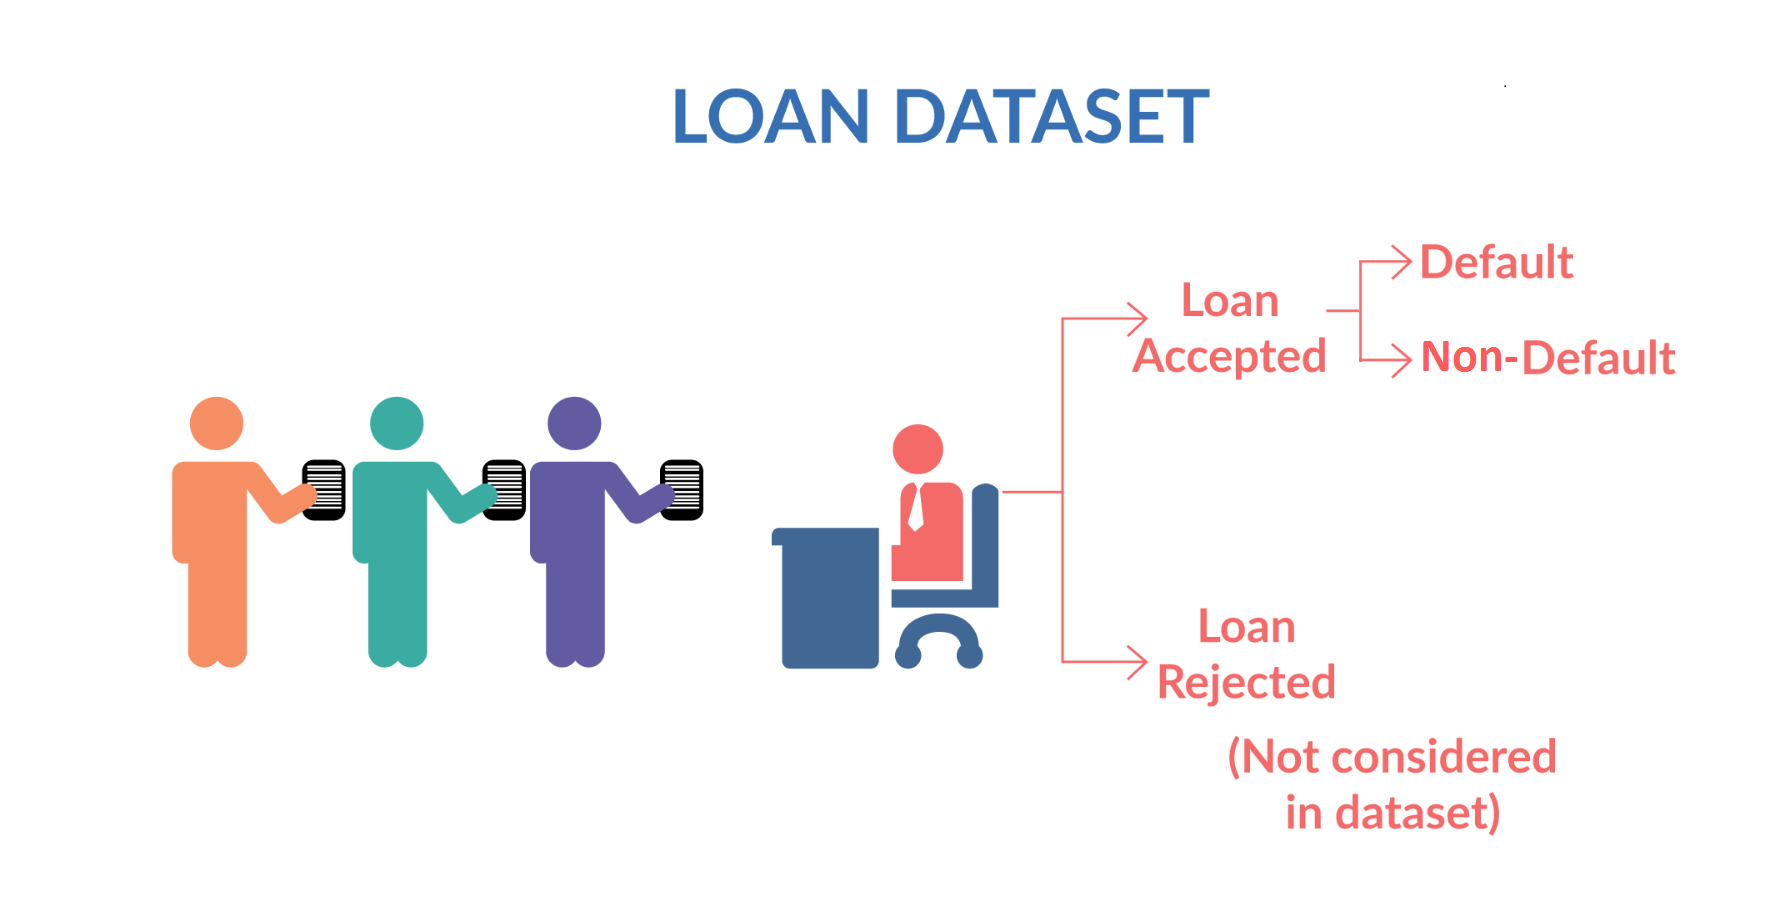

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. **Loan accepted**: \
    If the company approves the loan, there are 3 possible scenarios described below:

    1. **Fully paid**: \
        Applicant has fully paid the loan (the principal and the interest rate)

    2. **Current**: \
        Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    3. **Charged-off**: \
        Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. **Loan rejected**: \
    The company had rejected the loan (because the candidate does not meet their requirements etc.). \

Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives
This company is the largest online loan marketplace facilitating 
1. personal loans
2. business loans
3. financing of medical procedures. \
Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to **risky** applicants is the largest source of financial loss _(called credit loss)_. \
Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as **charged-off** are the **defaulters**. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).


## Solution
    First we need to import the data and clean it using following conditions
    1. Datatype and Data are in sync
    2. Can string data be converted to numeric types by cleaning


In [347]:
## Read data from the CSV file into a Pandas Dataframe

df = pd.read_csv(r"E:\Masters Program\Sept Submission - Lending Club Problem Statement\loan.csv",low_memory=False)
df.select_dtypes(include=['object']).columns  ## Find columns having object datatype

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [348]:
df[df.select_dtypes(include=['object']).columns].head(5)


,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,NaN,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,NaN,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,NaN,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,Jan-96,53.90%,f,May-16,Jun-16,May-16,INDIVIDUAL


In the sample data we can see that the columns
1. term ( Loan Term )
2. int_rate ( Intrest Rate )
3. revol_util ( Revolving Credit ) \
Are mentioned as non numeric but are numeric columns. Hence need to correct them


In [349]:
df_datatype_fixed = df.copy()
df_datatype_fixed['term'] = pd.to_numeric( df_datatype_fixed.term.str.replace(" months","") )
df_datatype_fixed['int_rate'] = pd.to_numeric( df_datatype_fixed.int_rate.str.replace("%","") )
df_datatype_fixed['revol_util'] = pd.to_numeric( df_datatype_fixed.revol_util.str.replace("%","") )
df_datatype_fixed['issue_d'] = pd.to_datetime( df_datatype_fixed.issue_d,format='%b-%y' )
df_datatype_fixed['last_pymnt_d'] = pd.to_datetime( df_datatype_fixed.last_pymnt_d,format='%b-%y' )
df_datatype_fixed['next_pymnt_d'] = pd.to_datetime( df_datatype_fixed.next_pymnt_d,format='%b-%y' )
df_datatype_fixed['last_credit_pull_d'] = pd.to_datetime( df_datatype_fixed.last_credit_pull_d,format='%b-%y' )
df_datatype_fixed['earliest_cr_line'] = pd.to_datetime( df_datatype_fixed.earliest_cr_line,format='%b-%y' )

df_datatype_fixed.select_dtypes(include=['object'])

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type
0,B,B2,NaN,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,f,INDIVIDUAL
1,C,C4,Ryder,< 1 year,RENT,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,f,INDIVIDUAL
2,C,C5,NaN,10+ years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,f,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,f,INDIVIDUAL
4,B,B5,University Medical Group,1 year,RENT,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,f,INDIVIDUAL
39713,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,f,INDIVIDUAL
39714,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,f,INDIVIDUAL
39715,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,f,INDIVIDUAL


The best way to start is to understand who defaults. With the given data, let us try to find out how many absolute number of customers have defaulted

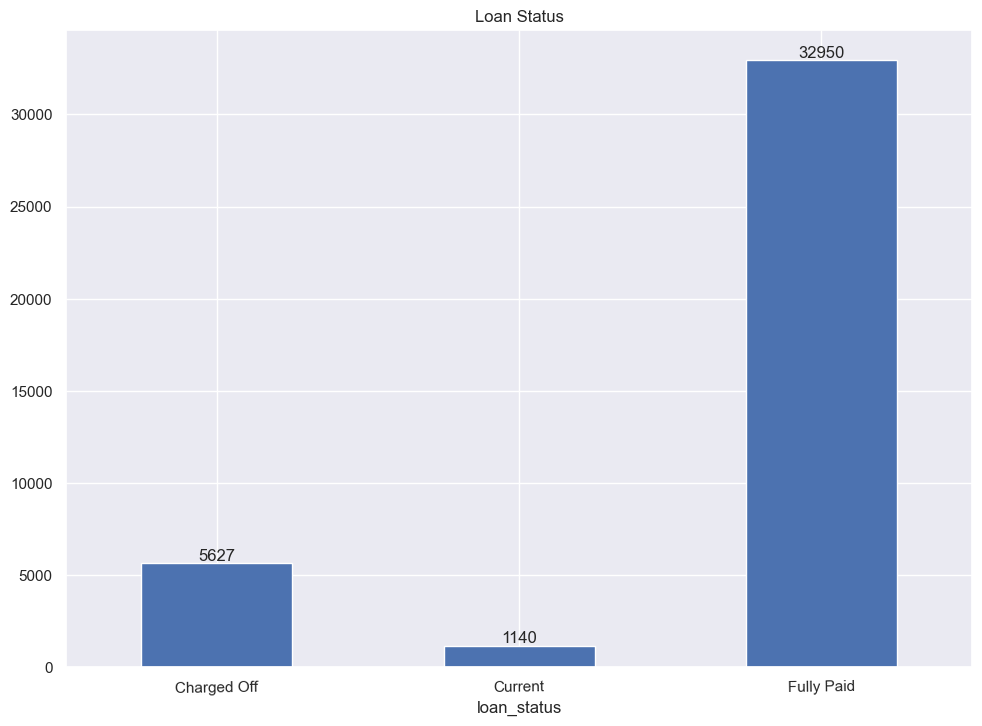

In [350]:
loan_status = df_datatype_fixed.groupby(by=['loan_status']).count().member_id
ax = loan_status.plot(kind='bar', title="Loan Status")
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x',labelrotation=0.9)


With Above Data it is clear that the customers with **> 10 years** of experience tend to default the loan

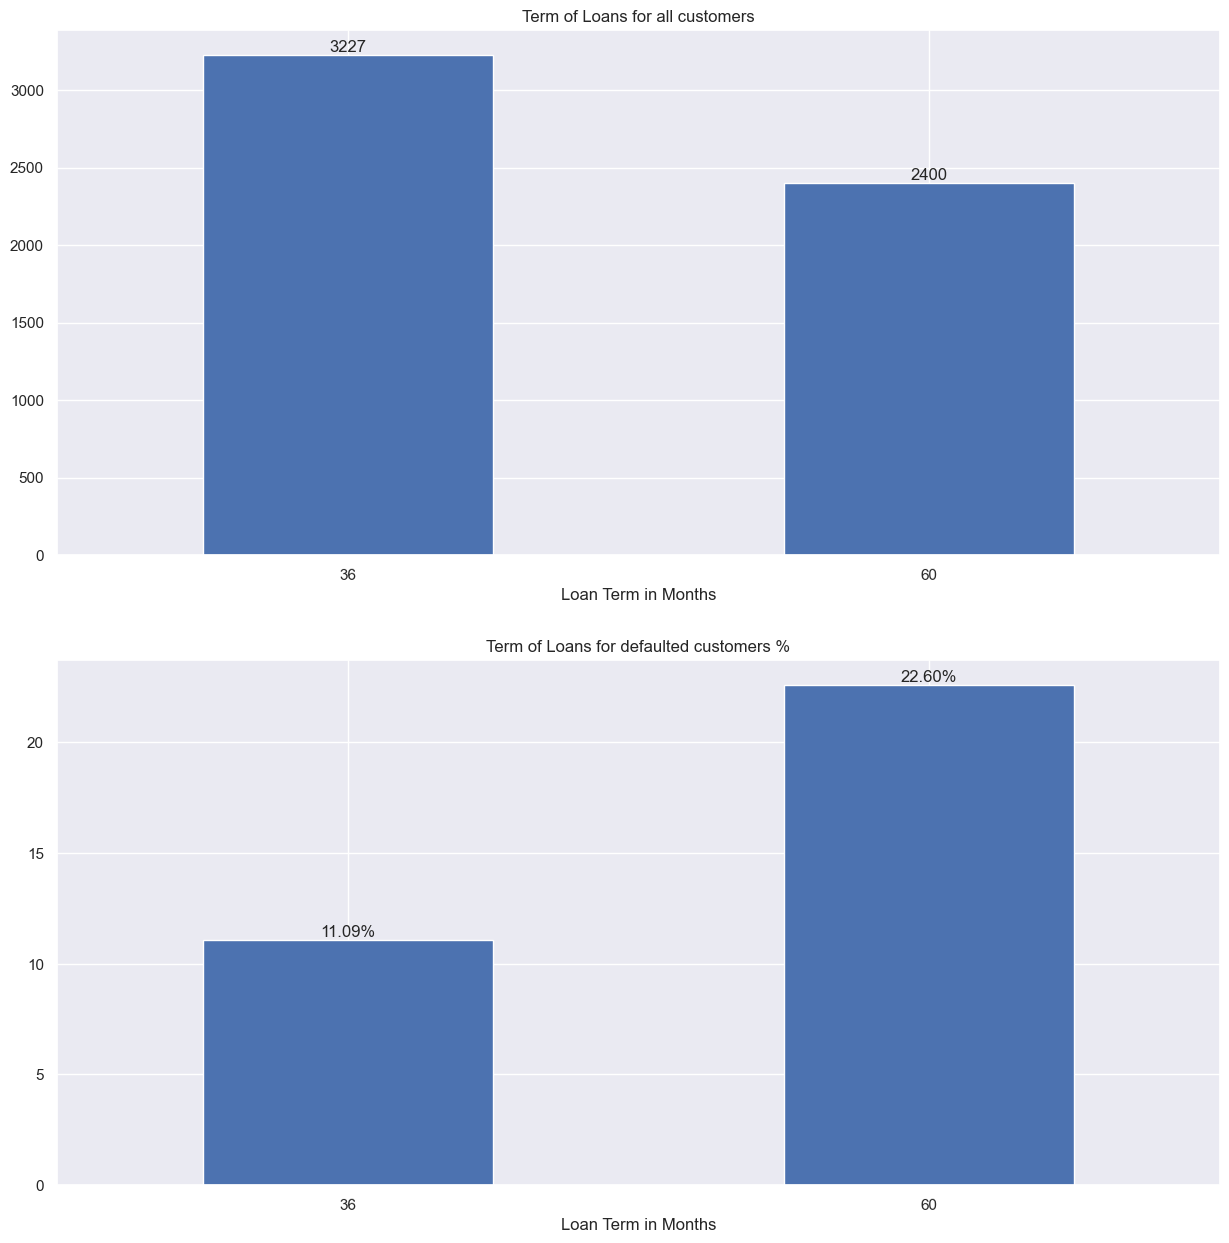

In [353]:
fig, axes = plt.subplots(2, figsize = (15,15))

a1 = axes[0]
a2 = axes[1]

term = df_datatype_fixed[df_datatype_fixed['loan_status'] == 'Charged Off'].groupby(by=['term']).count().member_id
ax = term.plot(kind='bar', ax=a1, title="Term of Loans for all customers", xlabel="Loan Term in Months")
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x',labelrotation=0.9)


term_per = ( df_datatype_fixed[df_datatype_fixed['loan_status'] == 'Charged Off'].groupby(by=['term']).count().member_id/df_datatype_fixed.groupby(by=['term']).count().member_id)*100
ax1 = term_per.plot(kind='bar', ax=a2, title="Term of Loans for defaulted customers %", xlabel="Loan Term in Months")
ax1.bar_label(ax1.containers[0], labels=[ f'{value:.2f}%' for value in ax1.containers[0].datavalues ])
ax1.tick_params(axis='x',labelrotation=0.9)

plt.show()



The above graph shows that the Loans with greater tenure are prone to default

The Above Chart shows that the Loans with high Intrest Rate are more likely to default

Verified Customers tend to default more

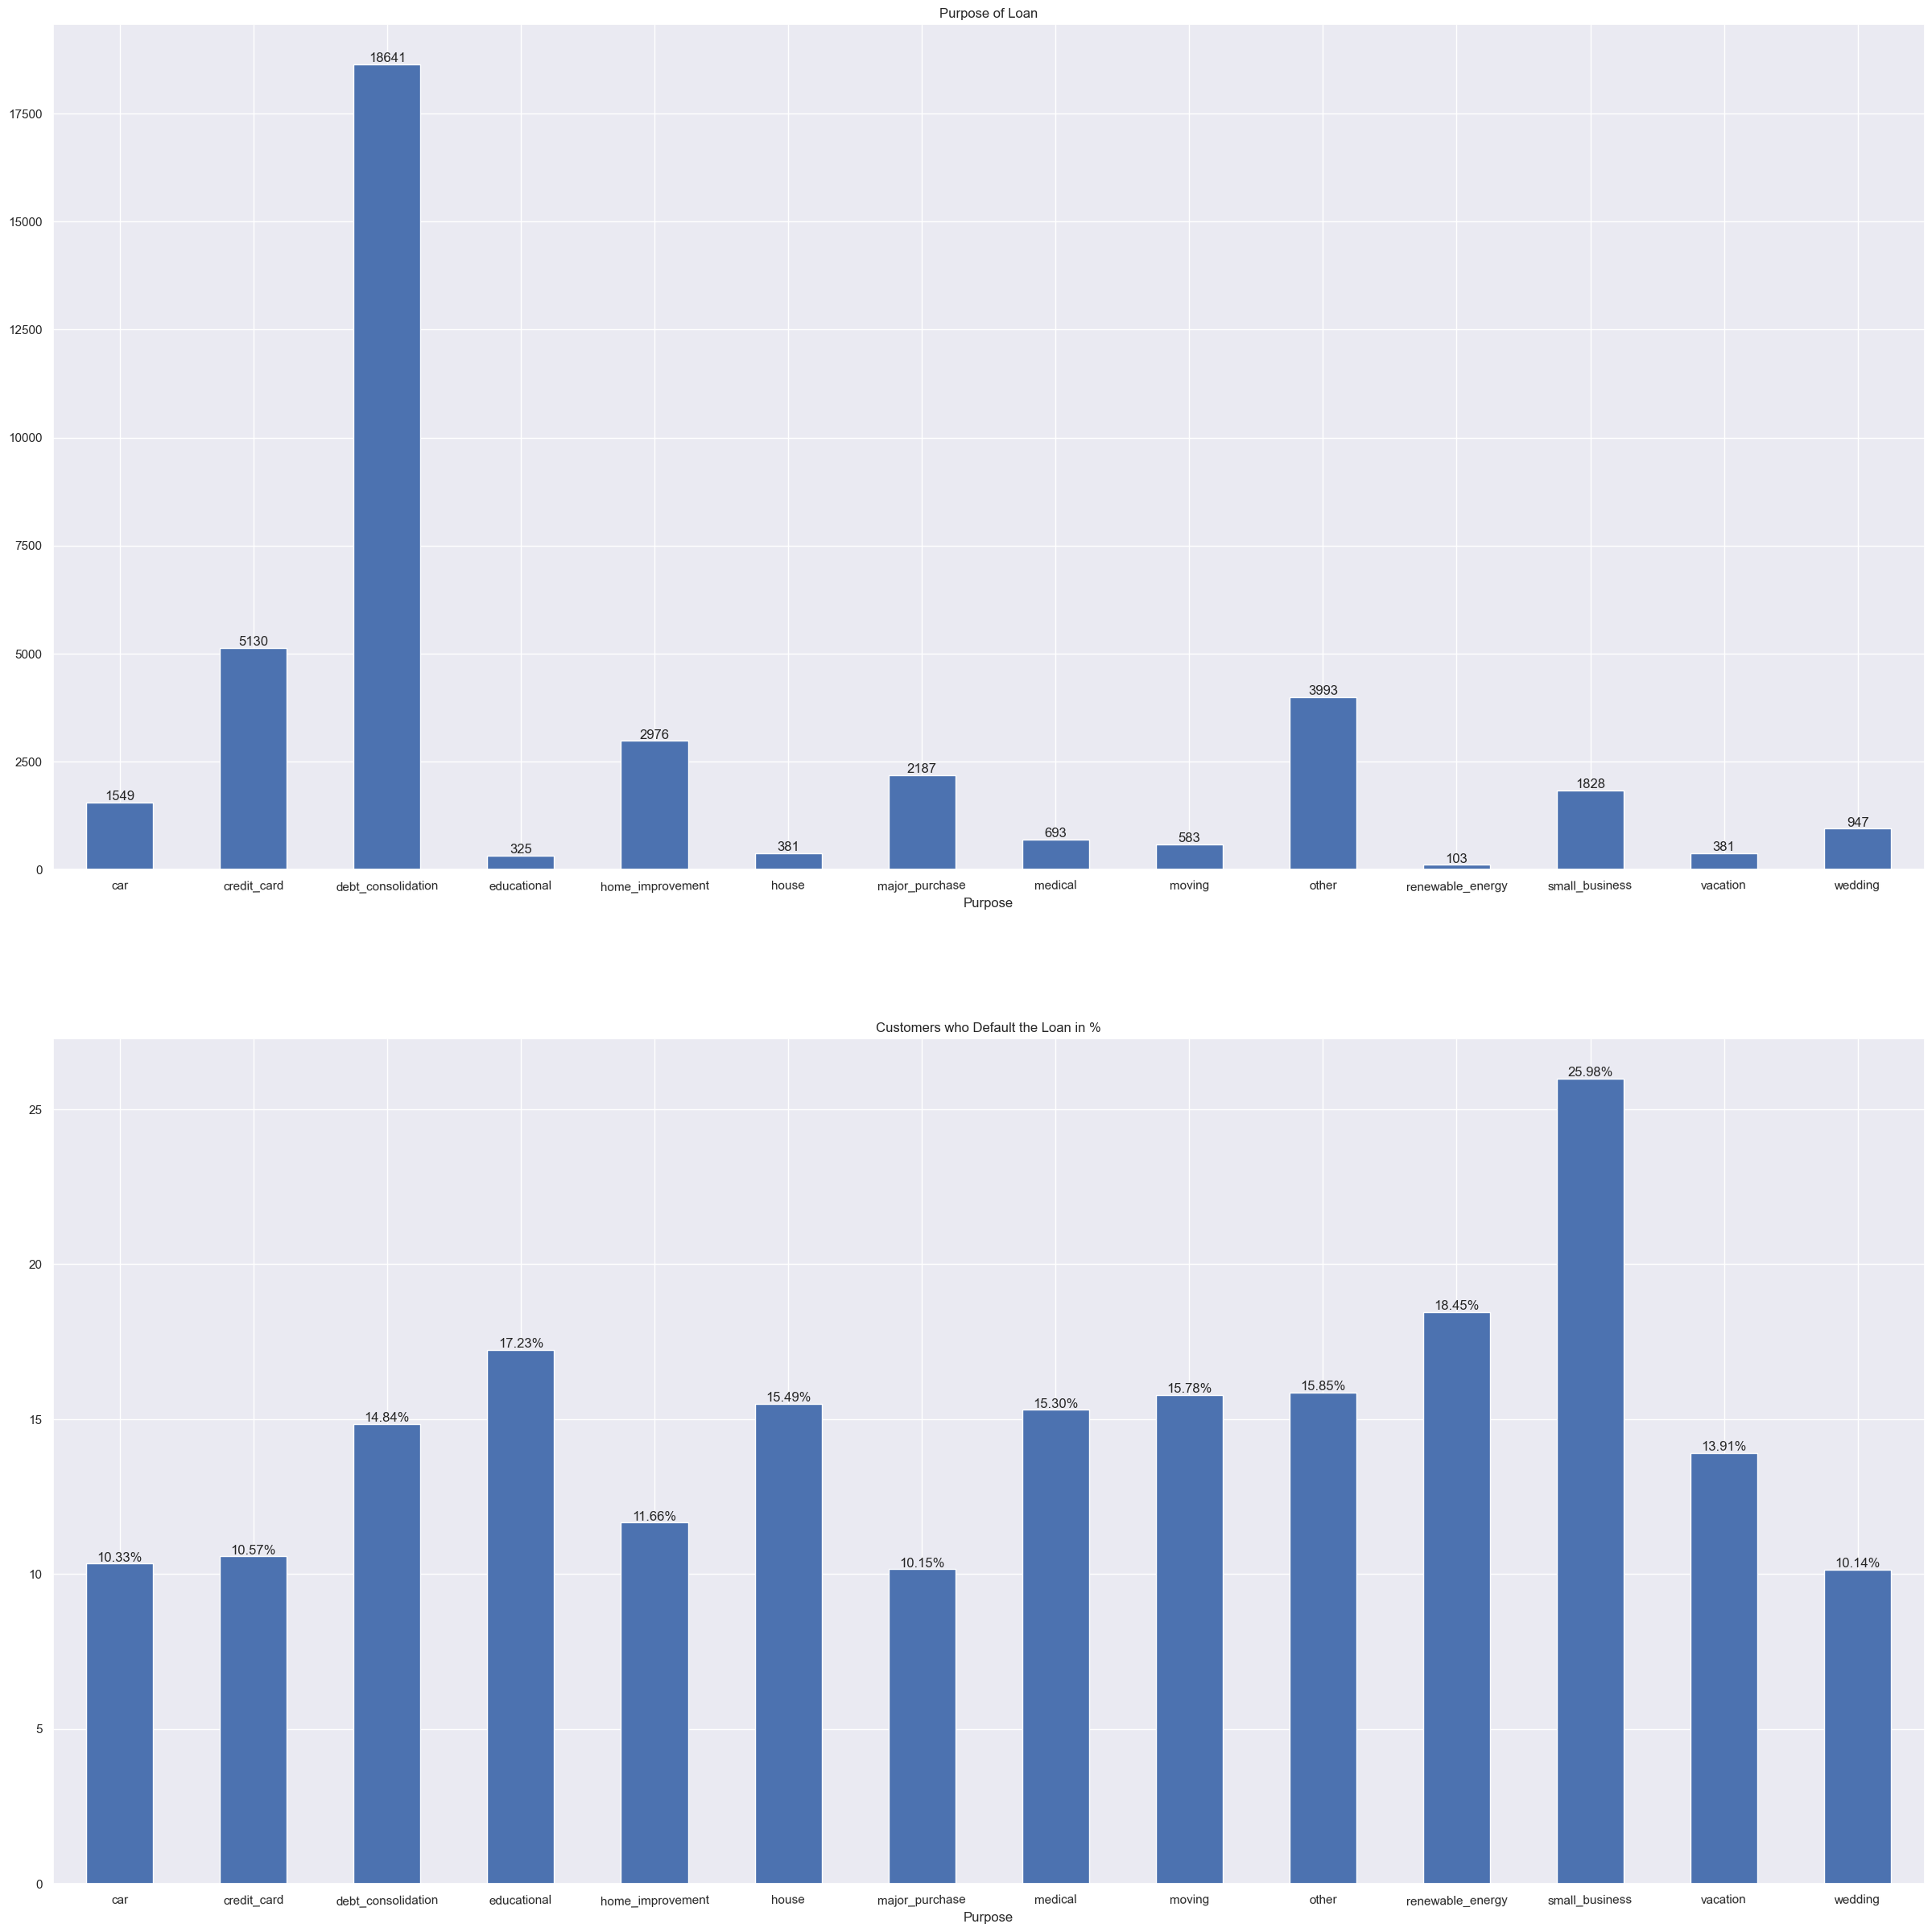

In [358]:
fig, axes = plt.subplots(2, figsize=(30,30))

a1 = axes[0]
a2 = axes[1]



purpose = df_datatype_fixed.groupby(by=['purpose']).count().member_id
ax1 = purpose.plot(kind='bar',ax=a1)
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel("Purpose")
ax1.set_title("Purpose of Loan")
ax1.tick_params(axis='x',labelrotation=0.9)

purpose_charged_off = ( df_datatype_fixed[df_datatype_fixed['loan_status'] == 'Charged Off'].groupby(by=['purpose']).count().member_id / df_datatype_fixed.groupby(by=['purpose']).count().member_id ) *100
ax2 = purpose_charged_off.plot(kind='bar',ax=a2)
ax2.bar_label(ax2.containers[0], labels=[ f'{value:.2f}%' for value in ax2.containers[0].datavalues ])
ax2.set_xlabel("Purpose")
ax2.set_title("Customers who Default the Loan in %")
ax2.tick_params(axis='x',labelrotation=0.9)

plt.show()

Customers who usually get Loan for debt_consolidation, usually tend to default more. The 

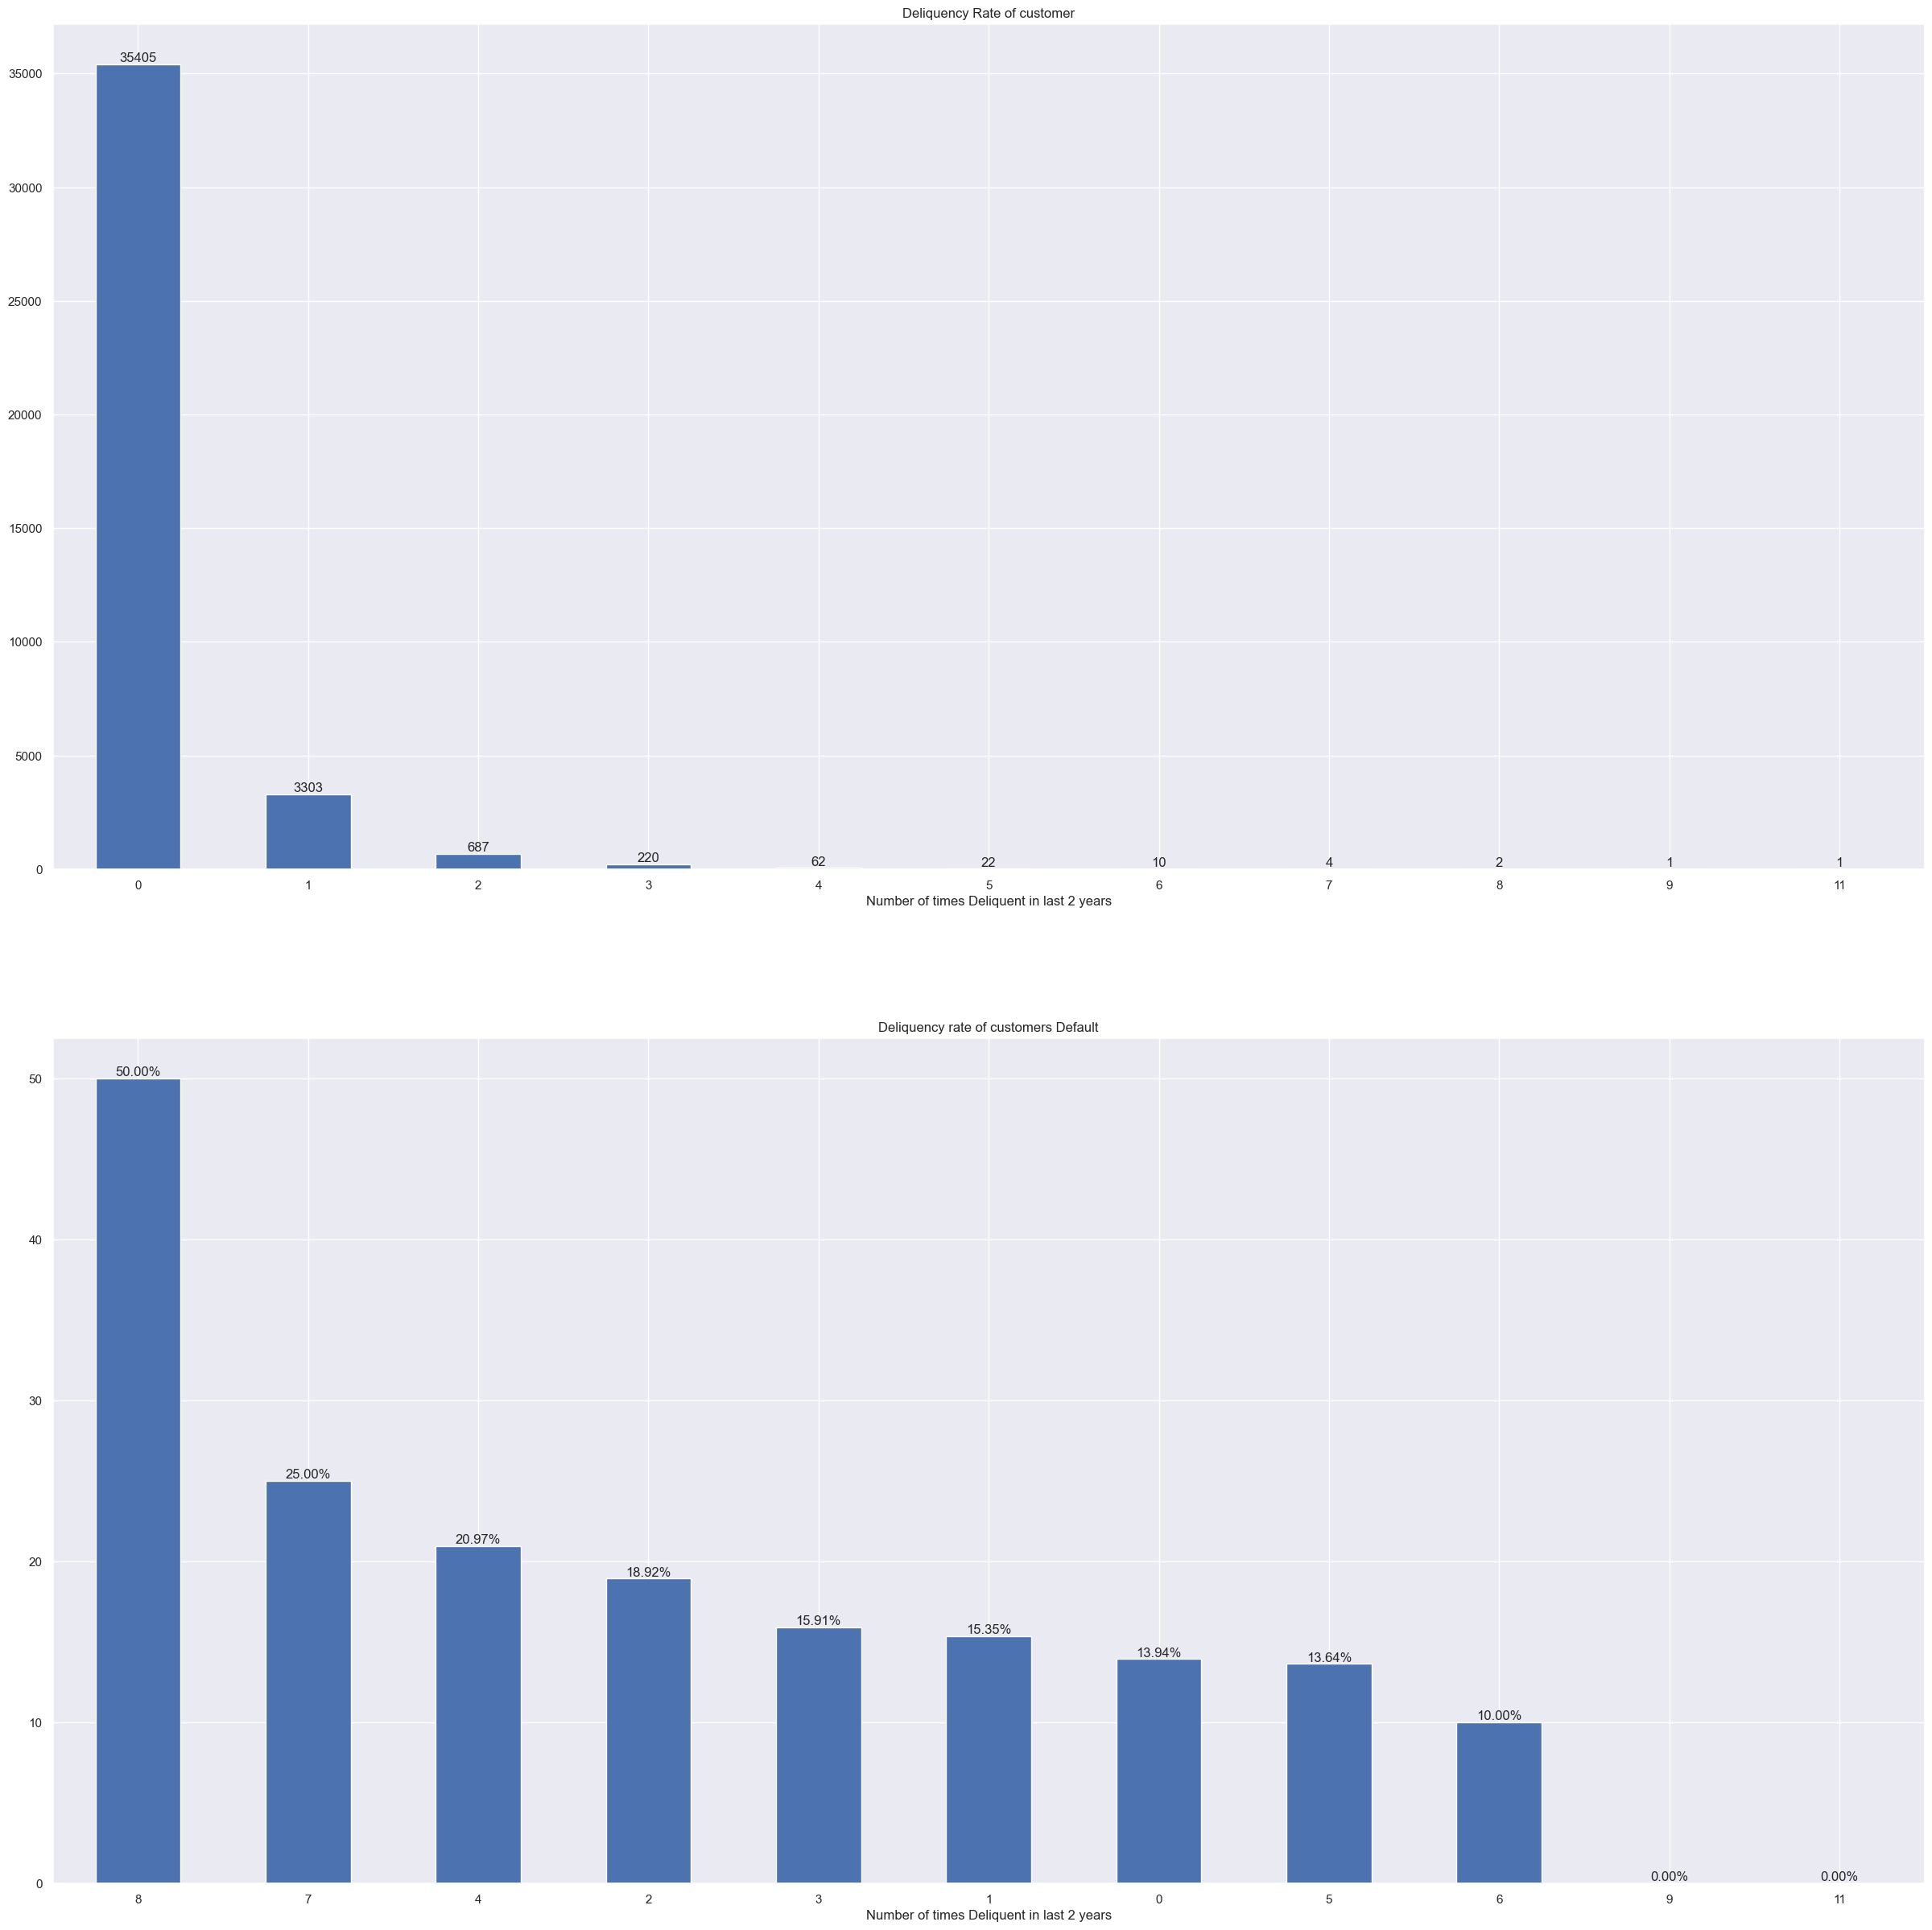

In [361]:
fig, axes = plt.subplots(2, figsize=(30,30))

a1 = axes[0]
a2 = axes[1]



delinq_2yrs = df_datatype_fixed.groupby(by=['delinq_2yrs']).count().member_id
ax1 = delinq_2yrs.sort_values(ascending=False).plot(kind='bar',ax=a1)
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel("Number of times Deliquent in last 2 years")
ax1.set_title("Deliquency Rate of customer")
ax1.tick_params(axis='x',labelrotation=0.9)

delinq_2yrs_charged_off = ( df_datatype_fixed[df_datatype_fixed['loan_status'] == 'Charged Off'].groupby(by=['delinq_2yrs']).count().member_id / df_datatype_fixed.groupby(by=['delinq_2yrs']).count().member_id ) *100
ax2 = delinq_2yrs_charged_off.sort_values(ascending=False).plot(kind='bar',ax=a2)
ax2.bar_label(ax2.containers[0], labels=[ f'{value:.2f}%' for value in ax2.containers[0].datavalues ])
ax2.set_xlabel("Number of times Deliquent in last 2 years")
ax2.set_title("Deliquency rate of customers Default")
ax2.tick_params(axis='x',labelrotation=0.9)

plt.show()

<Axes: >

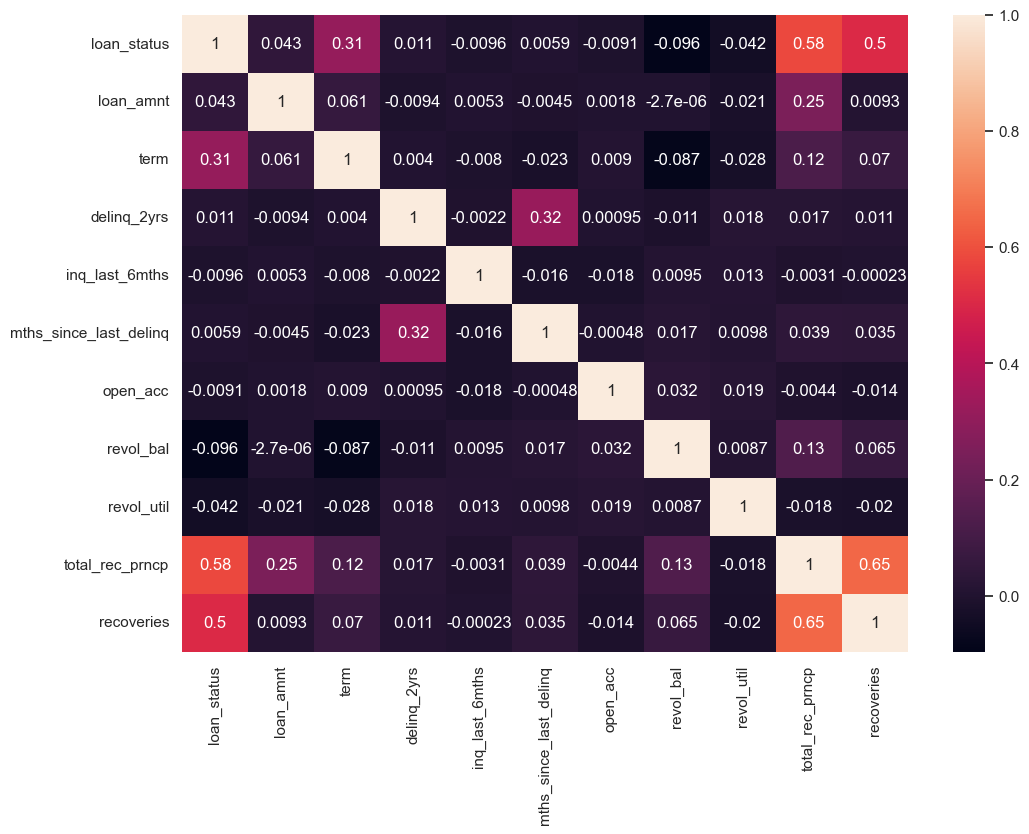

In [678]:
sns.heatmap( df_datatype_fixed[['loan_status','loan_amnt','term','delinq_2yrs','inq_last_6mths', \
                                'mths_since_last_delinq','open_acc','revol_bal','revol_util','total_rec_prncp', \
                                'recoveries']].apply(lambda s : s.factorize()[0]).corr(), annot=True )

## Corelations
From the above Heat Map we can see that the below co-relations have a strong relation in decision making

### Loan Amount
1. Loan Amount Vs. Intrest Recieved till Date
2. Loan Amount Vs. Principal Recieved till Date
3. Loan Amount Vs. Revolving Balance
4. Loan Amount Vs. Open Credit Accounts
5. Loan Amount Vs. Term
6. Loan Amount Vs. Annual Income
7. Loan Amount Vs. Intrest Rate

### Intrest Rate
1. Intrest Rate Vs. Intrest Recieved till Date
2. Intrest Rate Vs. Principal Recieved till Date
3. Intrest Rate Vs. Recoveries
4. Intrest Rate Vs. Revolving Balance Utilization
5. Intrest Rate Vs. Deliquency in Last 2 years
6. Intrest Rate Vs. Inquiery in Last 6 months
7. Intrest Rate Vs. Debt-to-Income Raito
8. Intrest Rate Vs. Term

### Term
1. Term Vs. Recoveries
2. Term Vs. Intrest Recieved Till Date
3. Term Vs. Principal Recieved Till Date

_**The Next Question will be How the parameters affect Charge Off and what can be added in the parameters to avoid it**_

#### Corelation of Term, Recoveries, Intrest Recieved till date, Principal Recieved till date and ChargeOff

<Axes: >

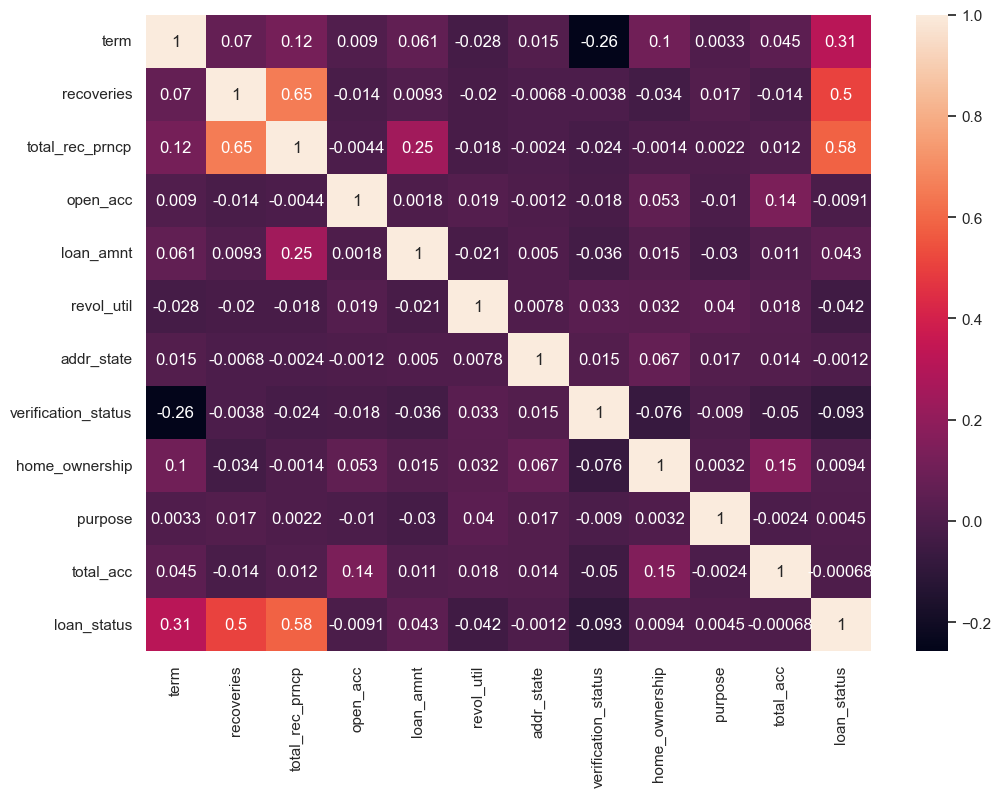

In [686]:
df_ctab = df_datatype_fixed[['term','recoveries','total_rec_prncp',\
                            'open_acc','loan_amnt','revol_util','addr_state','verification_status','home_ownership' ,\
                            'purpose','total_acc',\
                            'loan_status']].apply(lambda s : s.factorize()[0]).corr()
#pd.crosstab( df_ctab.term,df_ctab.recoveries,df_ctab.total_rec_prncp,df_ctab.total_rec_int,df_ctab.loan_status)
sns.heatmap(df_ctab, annot=True)

From the above heat map it is clear that Loan Status is majorly dependent on
1. Term
2. Recovery
3. Pricipal Reieved till Date

The Minor Factors that help in the Loan Status Identification are
1. Loan Amount
2. Home Ownership
3. Purpose

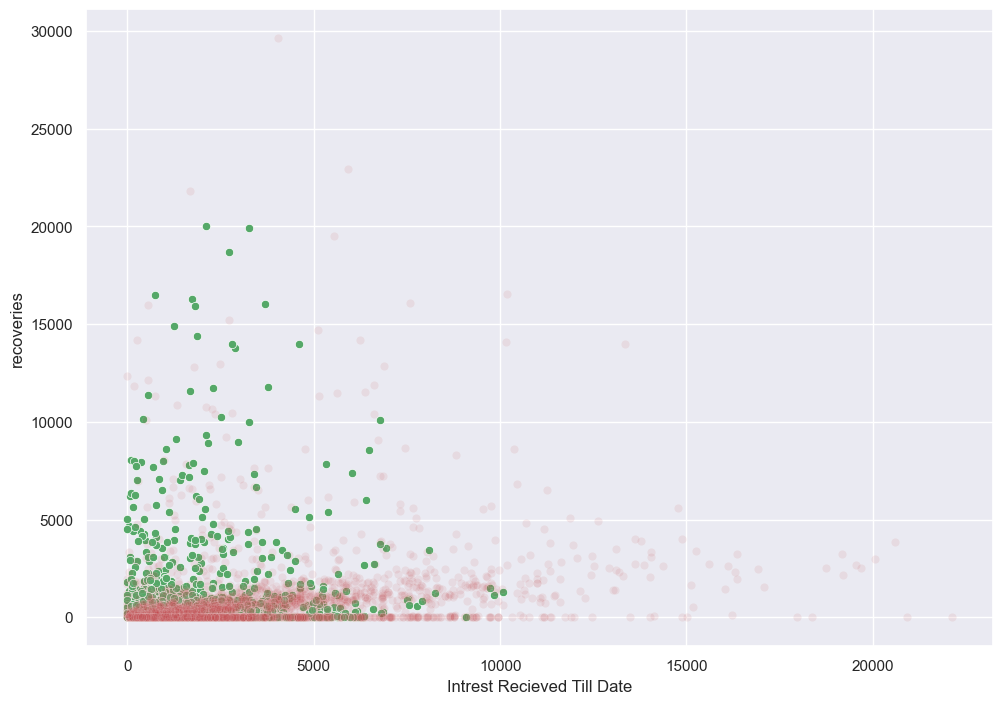

In [602]:
x = sns.scatterplot(df_datatype_fixed[(df_datatype_fixed['loan_status'] == 'Charged Off') & (df_datatype_fixed['term'] == 36)][['term','recoveries','total_rec_int']], x='total_rec_int',y='recoveries', color='g')
x = sns.scatterplot(df_datatype_fixed[(df_datatype_fixed['loan_status'] == 'Charged Off')  & (df_datatype_fixed['term'] == 60)][['term','recoveries','total_rec_int']], x='total_rec_int',y='recoveries', color='r', alpha=0.1)
x.set_xlabel("Intrest Recieved Till Date")
plt.show()

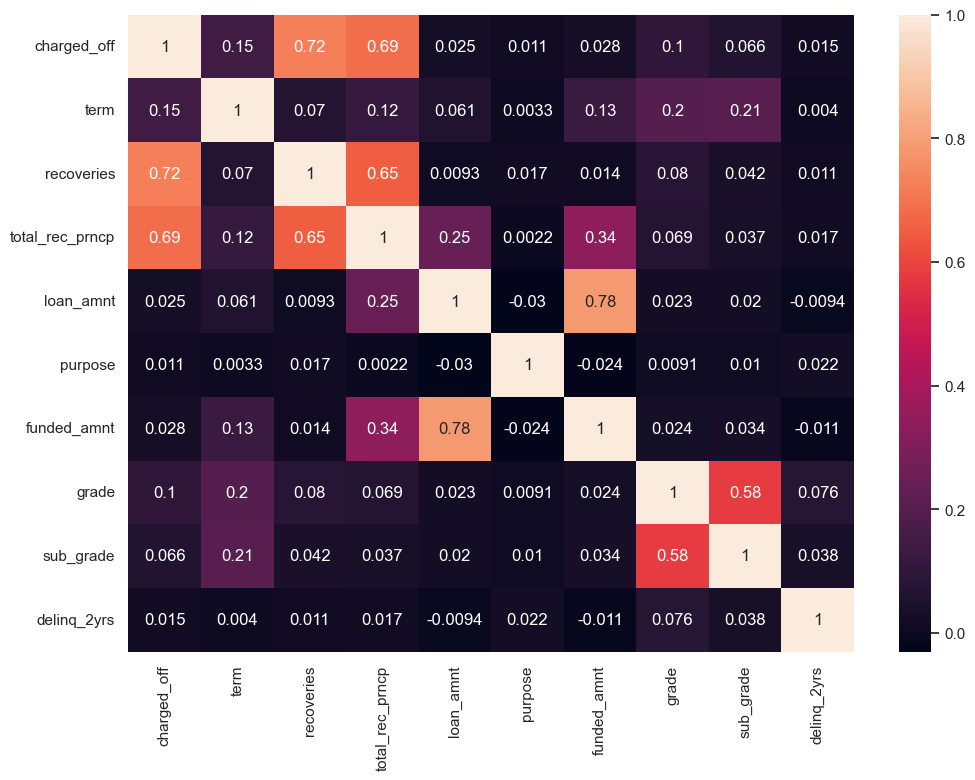

In [657]:
df_datatype_fixed['charged_off'] = df_datatype_fixed['loan_status'] == 'Charged Off'
df_datatype_fixed['fully_paid'] = df_datatype_fixed['loan_status'] == 'Fully Paid'
df_datatype_fixed['current'] = df_datatype_fixed['loan_status'] == 'Current'
corr  = df_datatype_fixed[['charged_off','term','recoveries','total_rec_prncp','loan_amnt','purpose',\
                           'funded_amnt','grade','sub_grade',\
                           'delinq_2yrs' ]].apply(lambda s : s.factorize()[0]).corr()
sns.heatmap(corr,annot=True)
plt.show()

Text(0.5, 12.444444444444473, 'Principal Recieved till Date')

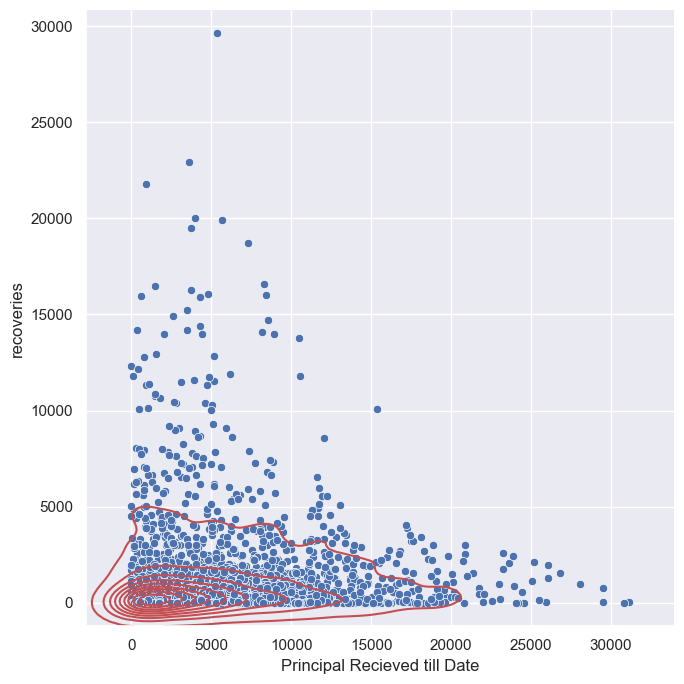

In [689]:
x = sns.relplot(df_datatype_fixed[df_datatype_fixed['charged_off']],x='total_rec_prncp',y='recoveries',height=7)
x = sns.kdeplot(df_datatype_fixed[df_datatype_fixed['charged_off']],x='total_rec_prncp',y='recoveries',color='r')
x.set_xlabel('Principal Recieved till Date')

Text(0.5, 1.0, 'The total amount committed to that loan at that point in time for Charged Off Accounts')

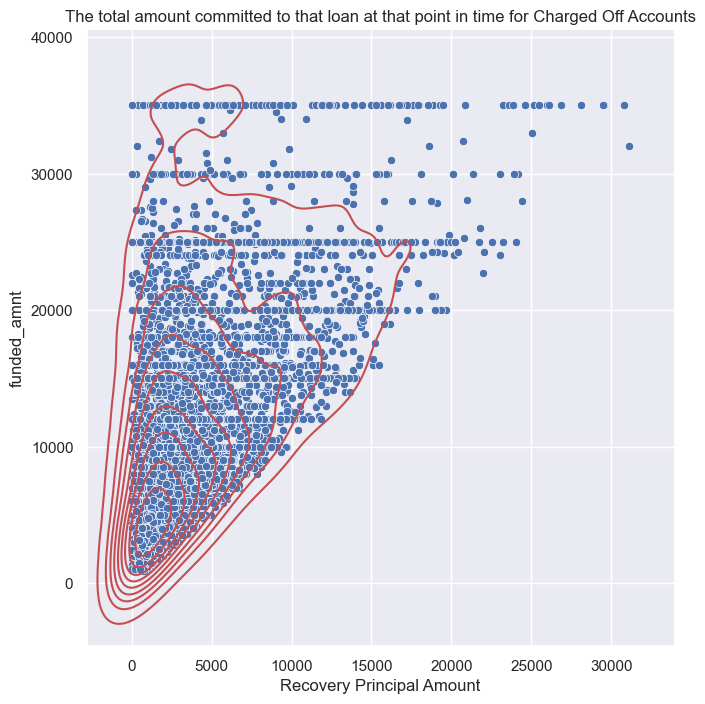

In [695]:
x = sns.relplot(df_datatype_fixed[df_datatype_fixed['charged_off']],x='total_rec_prncp',y='funded_amnt',height=7)
x = sns.kdeplot(df_datatype_fixed[df_datatype_fixed['charged_off']],x='total_rec_prncp',y='funded_amnt',color='r')
x.set_xlabel('Recovery Principal Amount')
x.set_title('The total amount committed to that loan at that point in time for Charged Off Accounts')

Text(0.5, 1.0, 'Grade to Loan Amount')

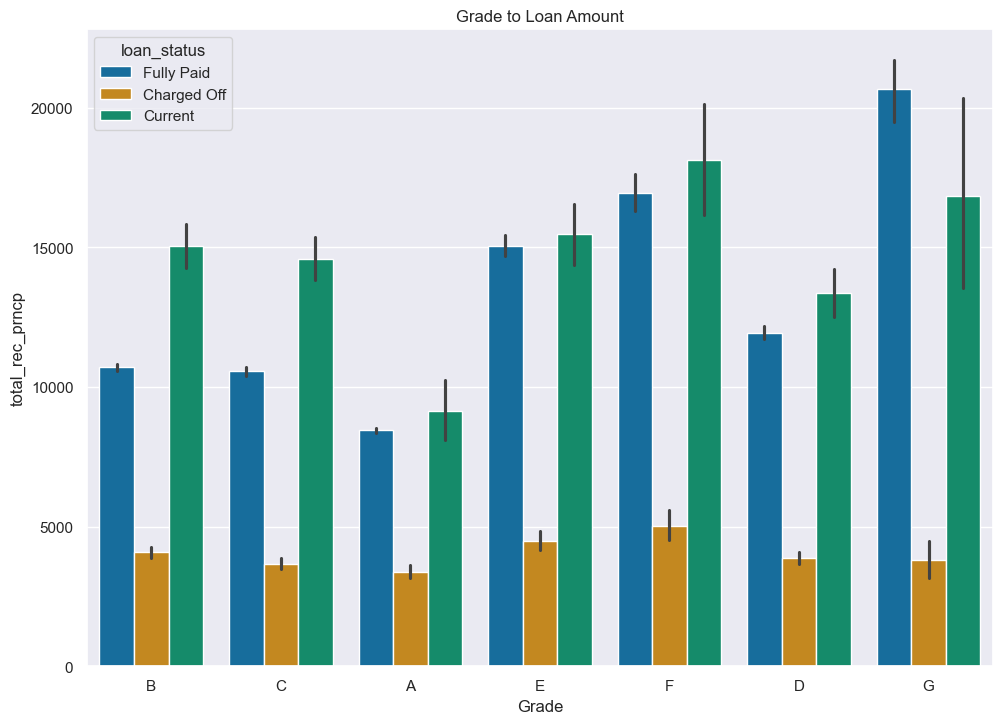

In [716]:
x = sns.barplot(df_datatype_fixed,x='grade',y='total_rec_prncp', estimator='average',palette='colorblind', hue='loan_status')
x.set_xlabel('Grade')
x.set_title('Grade to Loan Amount')

Text(0, 0.5, 'Average Loan Amount')

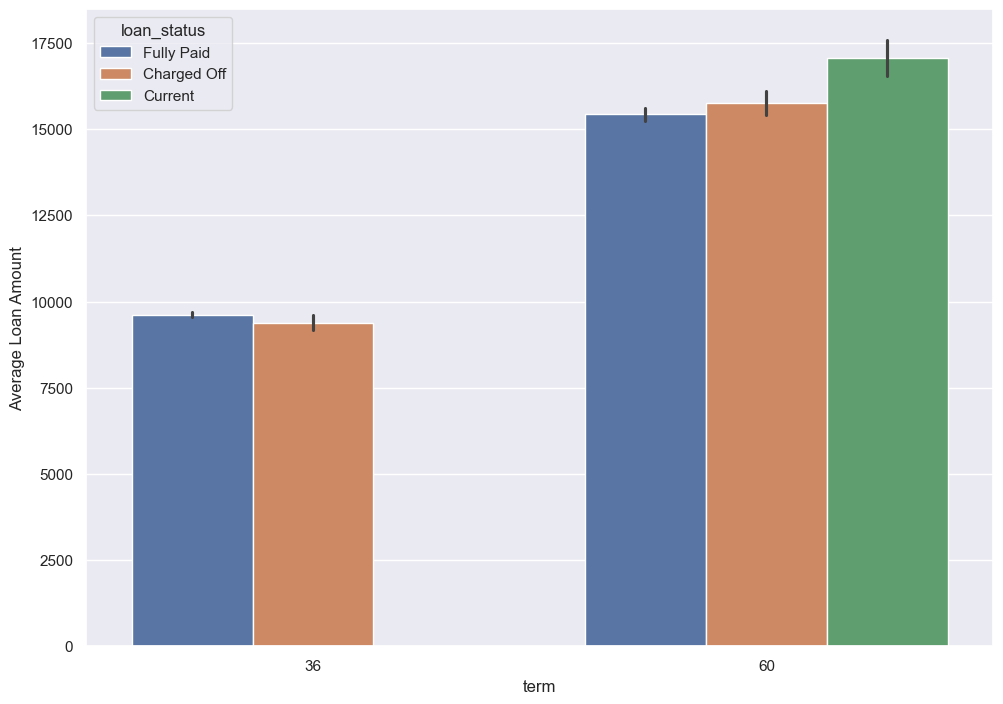

In [720]:
x = sns.barplot(df_datatype_fixed,x='term',y='loan_amnt', estimator='average', hue='loan_status')
x.set_ylabel("Average Loan Amount")

<Axes: xlabel='grade', ylabel='member_id'>

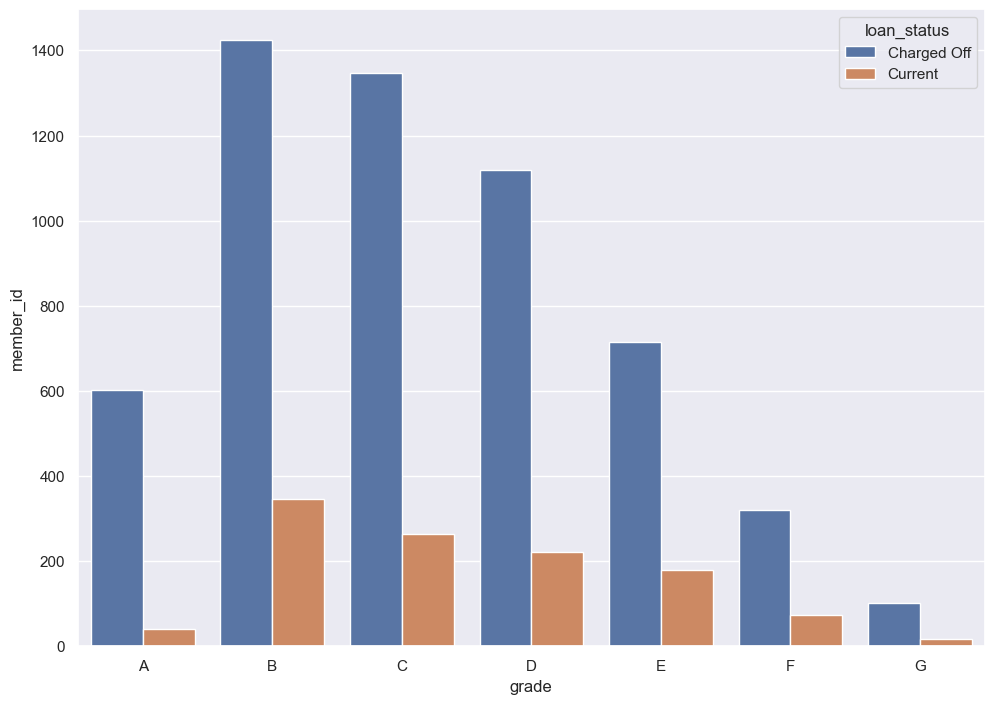

In [800]:
d = df_datatype_fixed.groupby(['grade','loan_status']).member_id.count().reset_index()
sns.barplot( d[d['loan_status'] != 'Fully Paid'], x='grade', y='member_id', hue='loan_status')


<Axes: xlabel='sub_grade', ylabel='member_id'>

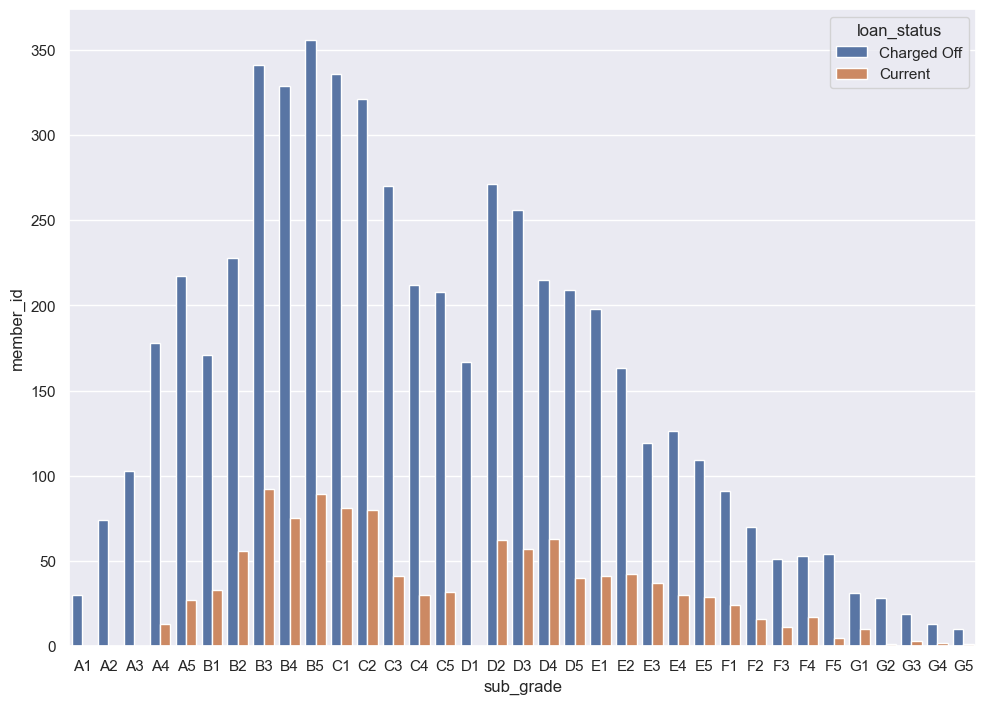

In [801]:
d = df_datatype_fixed.groupby(['sub_grade','loan_status']).member_id.count().reset_index()
sns.barplot( d[d['loan_status'] != 'Fully Paid'], x='sub_grade', y='member_id', hue='loan_status')

<Axes: xlabel='grade', ylabel='member_id'>

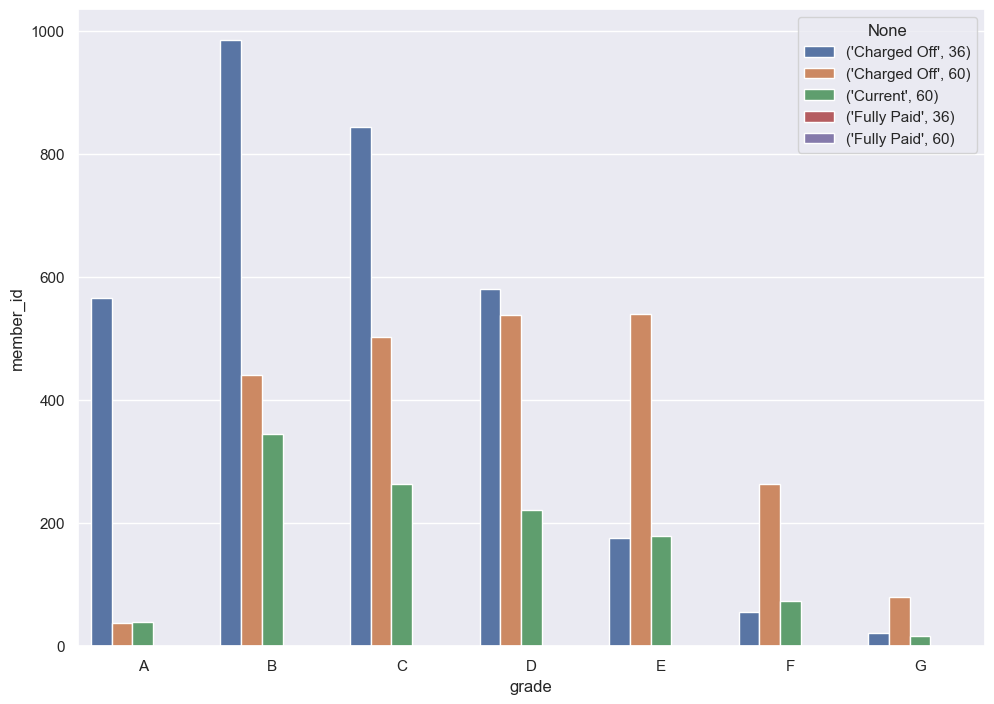

In [834]:
d = df_datatype_fixed.groupby(['grade','loan_status','term']).member_id.count().reset_index()
sns.barplot( d[d['loan_status']!='Fully Paid'], x='grade', y='member_id', hue=d[['loan_status','term']].apply(tuple, axis=1))


<Axes: xlabel='term', ylabel='total_rec_prncp'>

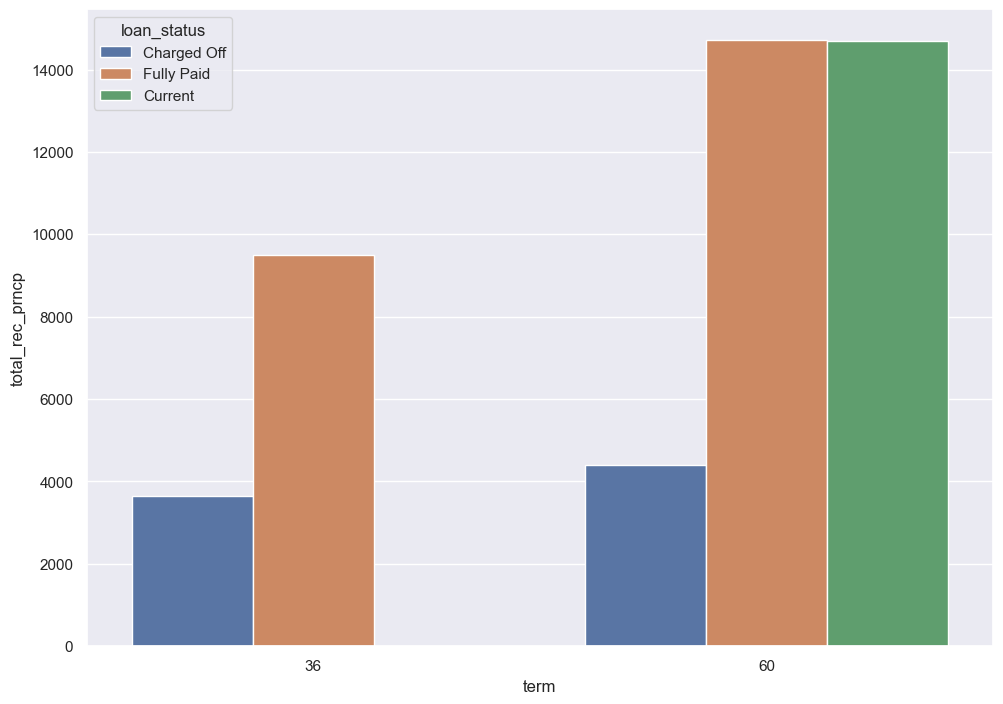

In [847]:
d = df_datatype_fixed.groupby(['loan_status','term']).total_rec_prncp.mean().reset_index()
sns.barplot( d, y='total_rec_prncp', x='term', hue='loan_status')

## Decisioning Solution

The Loans that are charged-off are less than the onces that are fully paid
The customers who have below attributes tend to Default the Loan
1. High Term Loans
2. Having Intrest Rate above 11%
3. Having No Public Bankrupties
4. Customer with no Ownership
5. With the Purpose of Small Business
6. Having Less Loan Account
7. Loans from States where Number of Loans is less
8. Higher Intrest Rate for Lower Time tend to Default
9. Higher Intrest Rate and Lower Income tend to Default